In [1]:
import pandas as pd 
import os 
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Read and display data
flight_delay_URL= "https://www.kaggle.com/datasets/sriharshaeedala/airline-delay/"
od.download(flight_delay_URL, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  princessnwabulu


Your Kaggle Key:

  ········


100%|███████████████████████████████████████████| 6.44M/6.44M [00:00<00:00, 26.4MB/s]


In [3]:
# Display data
flight_delay= pd.read_csv("resources\Airline_Delay_Cause.csv")
flight_delay

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [4]:
# Drop last five columns(data not needed for analysis), drop "carrier" and ,"airport_name" column
last_five_columns = ['carrier','airport_name','carrier_delay', 'weather_delay','nas_delay','security_delay', 'late_aircraft_delay']
flight_delay.drop(columns= last_five_columns, inplace=True)
flight_delay

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay
0,2023,8,Endeavor Air Inc.,ABE,89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0
1,2023,8,Endeavor Air Inc.,ABY,62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0
2,2023,8,Endeavor Air Inc.,AEX,62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0
3,2023,8,Endeavor Air Inc.,AGS,66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0
4,2023,8,Endeavor Air Inc.,ALB,92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,Mesa Airlines Inc.,TRI,7.0,1.0,0.78,0.00,0.22,0.0,0.00,0.0,0.0,23.0
171662,2013,8,Mesa Airlines Inc.,YUM,2.0,1.0,0.00,0.00,0.00,0.0,1.00,0.0,0.0,17.0
171663,2013,8,Mesa Airlines Inc.,SLC,2.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0
171664,2013,8,Delta Air Lines Inc.,SBN,1.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,18.0


In [5]:
# Use the `count` function to view count of non-null values for each column
flight_delay.count()

year                171666
month               171666
carrier_name        171666
airport             171666
arr_flights         171426
arr_del15           171223
carrier_ct          171426
weather_ct          171426
nas_ct              171426
security_ct         171426
late_aircraft_ct    171426
arr_cancelled       171426
arr_diverted        171426
arr_delay           171426
dtype: int64

In [6]:
# Check datatypes 
flight_delay.dtypes

year                  int64
month                 int64
carrier_name         object
airport              object
arr_flights         float64
arr_del15           float64
carrier_ct          float64
weather_ct          float64
nas_ct              float64
security_ct         float64
late_aircraft_ct    float64
arr_cancelled       float64
arr_diverted        float64
arr_delay           float64
dtype: object

In [7]:
# Count nulls 
flight_delay.isnull().sum()

year                  0
month                 0
carrier_name          0
airport               0
arr_flights         240
arr_del15           443
carrier_ct          240
weather_ct          240
nas_ct              240
security_ct         240
late_aircraft_ct    240
arr_cancelled       240
arr_diverted        240
arr_delay           240
dtype: int64

In [8]:
# Drop Nan from data set
flight_delay= flight_delay.dropna()
flight_delay

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay
0,2023,8,Endeavor Air Inc.,ABE,89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0
1,2023,8,Endeavor Air Inc.,ABY,62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0
2,2023,8,Endeavor Air Inc.,AEX,62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0
3,2023,8,Endeavor Air Inc.,AGS,66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0
4,2023,8,Endeavor Air Inc.,ALB,92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,Mesa Airlines Inc.,TRI,7.0,1.0,0.78,0.00,0.22,0.0,0.00,0.0,0.0,23.0
171662,2013,8,Mesa Airlines Inc.,YUM,2.0,1.0,0.00,0.00,0.00,0.0,1.00,0.0,0.0,17.0
171663,2013,8,Mesa Airlines Inc.,SLC,2.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0
171664,2013,8,Delta Air Lines Inc.,SBN,1.0,1.0,1.00,0.00,0.00,0.0,0.00,0.0,0.0,18.0


In [9]:
# Set 'Year' as index 
flight_delay.set_index(flight_delay['year'], inplace=True)
# Drop extra date column
flight_delay.drop(columns=['year'],inplace=True)
# Display data
flight_delay.head()

C:\Users\princ\AppData\Local\Temp\ipykernel_3928\1656182042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_delay.drop(columns=['year'],inplace=True)


,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay
year,,,,,,,,,,,,,
2023,8,Endeavor Air Inc.,ABE,89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0
2023,8,Endeavor Air Inc.,ABY,62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0
2023,8,Endeavor Air Inc.,AEX,62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0
2023,8,Endeavor Air Inc.,AGS,66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0
2023,8,Endeavor Air Inc.,ALB,92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0


In [10]:
# Drop year 2013-2019, 2021 & 2023
first_years= [2013,2014,2015,2016,2017, 2018,2019,2021,2023]
flight_delay.drop(index=first_years, inplace=True)
flight_delay

C:\Users\princ\AppData\Local\Temp\ipykernel_3928\2375986922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_delay.drop(index=first_years, inplace=True)


,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay
year,,,,,,,,,,,,,
2022,12,Endeavor Air Inc.,ABE,27.0,7.0,4.37,0.00,2.10,0.0,0.53,0.0,0.0,351.0
2022,12,Endeavor Air Inc.,ABY,69.0,3.0,0.61,0.00,0.02,0.0,2.37,0.0,0.0,136.0
2022,12,Endeavor Air Inc.,AEX,62.0,14.0,5.28,4.34,3.42,0.0,0.96,0.0,2.0,917.0
2022,12,Endeavor Air Inc.,AGS,47.0,10.0,5.12,0.57,1.00,1.0,2.31,0.0,0.0,488.0
2022,12,Endeavor Air Inc.,ALB,131.0,34.0,12.08,2.70,6.32,0.0,12.90,7.0,0.0,4017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1,Republic Airline,TUS,7.0,0.0,0.00,0.00,0.00,0.0,0.00,1.0,0.0,0.0
2020,1,Republic Airline,TVC,1.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0
2020,1,Republic Airline,TYS,112.0,10.0,1.79,1.00,4.01,0.0,3.20,0.0,0.0,352.0


In [11]:
# reset index column
yearly_flight_delay= flight_delay.reset_index()
yearly_flight_delay

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay
0,2022,12,Endeavor Air Inc.,ABE,27.0,7.0,4.37,0.00,2.10,0.0,0.53,0.0,0.0,351.0
1,2022,12,Endeavor Air Inc.,ABY,69.0,3.0,0.61,0.00,0.02,0.0,2.37,0.0,0.0,136.0
2,2022,12,Endeavor Air Inc.,AEX,62.0,14.0,5.28,4.34,3.42,0.0,0.96,0.0,2.0,917.0
3,2022,12,Endeavor Air Inc.,AGS,47.0,10.0,5.12,0.57,1.00,1.0,2.31,0.0,0.0,488.0
4,2022,12,Endeavor Air Inc.,ALB,131.0,34.0,12.08,2.70,6.32,0.0,12.90,7.0,0.0,4017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38923,2020,1,Republic Airline,TUS,7.0,0.0,0.00,0.00,0.00,0.0,0.00,1.0,0.0,0.0
38924,2020,1,Republic Airline,TVC,1.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0
38925,2020,1,Republic Airline,TYS,112.0,10.0,1.79,1.00,4.01,0.0,3.20,0.0,0.0,352.0
38926,2020,1,Republic Airline,VPS,8.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,47.0


In [12]:
#Count frequency of "carrier_name" column
flight_delay['carrier_name'].value_counts()

carrier_name
SkyWest Airlines Inc.      5573
Envoy Air                  3346
Delta Air Lines Inc.       3027
Allegiant Air              2896
American Airlines Inc.     2512
Endeavor Air Inc.          2406
Southwest Airlines Co.     2358
United Air Lines Inc.      2271
Mesa Airlines Inc.         2263
Frontier Airlines Inc.     2195
PSA Airlines Inc.          2162
Republic Airline           1872
Alaska Airlines Inc.       1785
JetBlue Airways            1449
Spirit Air Lines           1255
ExpressJet Airlines LLC     572
Horizon Air                 567
Hawaiian Airlines Inc.      419
Name: count, dtype: int64

Collect top 20 airports from dataframe

In [13]:
top_20_total_arrival_list = ["ATL","BOS","CLT","DCA","DEN","DFW","DTW","EWR","IAH","JFK","LAS","LAX","LGA","MCO","MSP","ORD","PHX","SEA","SFO","SLC","TPA"]
#creating top 20 DataFrame from the airport data
top_20_airport=yearly_flight_delay[yearly_flight_delay["airport"].isin(["ATL","BOS","CLT","DCA","DEN","DFW","DTW","EWR","IAH","JFK","LAS","LAX","LGA","MCO","MSP","ORD","PHX","SEA","SFO","SLC","TPA"])]
top_20_airport.tail()

,year,month,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay
38888,2020,1,Republic Airline,MCO,8.0,1.0,0.50,0.00,0.00,0.00,0.50,0.0,0.0,50.0
38895,2020,1,Republic Airline,MSP,406.0,48.0,13.06,1.82,17.35,0.74,15.03,9.0,1.0,1934.0
38900,2020,1,Republic Airline,ORD,1175.0,107.0,23.46,3.45,55.37,0.00,24.72,50.0,2.0,6623.0
38916,2020,1,Republic Airline,SEA,3.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
38917,2020,1,Republic Airline,SLC,8.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0


In [14]:
#recount frequency of "airport" column
top_20_airport['airport'].value_counts()

airport
MSP    341
DTW    336
ATL    335
CLT    305
DCA    303
BOS    302
ORD    300
DFW    293
IAH    293
PHX    284
LAS    270
EWR    266
LGA    264
LAX    262
SEA    252
DEN    249
SLC    234
TPA    232
SFO    228
MCO    213
JFK    173
Name: count, dtype: int64

In [15]:
#recount frequency of "carrier_name" column
top_20_airport['carrier_name'].value_counts()

carrier_name
Delta Air Lines Inc.       504
American Airlines Inc.     504
JetBlue Airways            497
United Air Lines Inc.      478
Frontier Airlines Inc.     458
Alaska Airlines Inc.       454
Spirit Air Lines           413
Southwest Airlines Co.     408
SkyWest Airlines Inc.      406
Republic Airline           324
Endeavor Air Inc.          254
Mesa Airlines Inc.         252
Envoy Air                  233
Hawaiian Airlines Inc.     147
PSA Airlines Inc.          135
Allegiant Air              133
Horizon Air                 82
ExpressJet Airlines LLC     53
Name: count, dtype: int64

In [16]:
# rename 'month' column to 'month_code', 'carrier_name' to 'carrier'
top_20_airport = top_20_airport.rename(columns={
    "month": "month_code",
    "carrier_name": "carrier"
})
top_20_airport.head()

,year,month_code,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay
5,2022,12,Endeavor Air Inc.,ATL,1691.0,257.0,61.47,6.66,60.43,0.0,128.44,7.0,2.0,21728.0
26,2022,12,Endeavor Air Inc.,CLT,216.0,33.0,11.97,0.00,9.52,0.0,11.51,6.0,1.0,1545.0
33,2022,12,Endeavor Air Inc.,DCA,129.0,26.0,4.38,0.90,13.60,0.0,7.13,1.0,0.0,1242.0
37,2022,12,Endeavor Air Inc.,DTW,1448.0,186.0,66.06,8.79,40.58,0.0,70.57,82.0,1.0,16856.0
39,2022,12,Endeavor Air Inc.,EWR,74.0,21.0,1.44,1.31,16.72,0.0,1.53,1.0,1.0,1231.0


In [17]:
# Descriptive analysis on dataset
top_20_airport.describe()

,year,month_code,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000
mean,2021.029468,6.423365,1054.389712,162.958849,56.697163,6.476493,48.940945,0.461439,50.382633,40.746120,2.139843,11511.978204
std,0.999653,3.483532,1794.181400,299.047040,100.439287,16.126744,95.488020,1.200258,113.696369,164.950107,6.030035,22945.792941
min,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,3.000000,91.000000,12.000000,4.925000,0.000000,2.615000,0.000000,1.590000,0.000000,0.000000,607.000000
50%,2022.000000,6.000000,364.000000,46.000000,18.090000,1.190000,11.840000,0.000000,8.850000,4.000000,0.000000,2778.000000
75%,2022.000000,9.000000,1205.000000,177.000000,63.065000,5.380000,50.715000,0.240000,47.015000,21.000000,2.000000,11734.000000
max,2022.000000,12.000000,20669.000000,3479.000000,1096.180000,222.900000,1391.740000,29.760000,1537.660000,4951.000000,153.000000,323449.000000


# Performance analysis

Plot the total number of arriving and delayed flight for each month to identify any sesonal trends or variations.

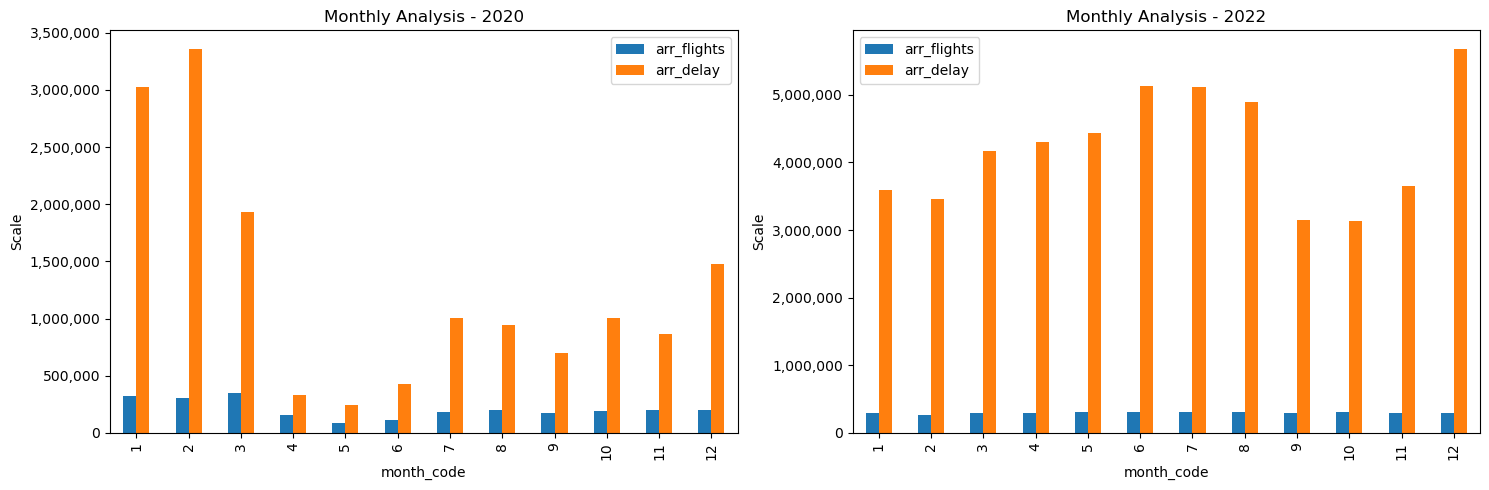

In [18]:
from matplotlib.ticker import FuncFormatter
# Filter data for the years 2020 and 2023
top_20_airport_2020 = top_20_airport[top_20_airport['year'] == 2020]
top_20_airport_2022 = top_20_airport[top_20_airport['year'] == 2022]

# Define variables for plot
Plot_1_variables = ['arr_flights', 'arr_delay']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot for 2020
top_20_airport_2020.groupby('month_code')[Plot_1_variables].sum().plot(ax=axes[0], kind='bar', title='Monthly Analysis - 2020')
axes[0].set_ylabel('Scale')
# Plot for 2022
top_20_airport_2022.groupby('month_code')[Plot_1_variables].sum().plot(ax=axes[1], kind='bar', title='Monthly Analysis - 2022')
axes[1].set_ylabel('Scale')

for ax in axes:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))


plt.tight_layout()
plt.show()


1. Covid Analysis Result(number of arriving and delayed flights) 

In [19]:
# the constructed plot analyzes the amount of arriving and delayed flights for year 2020 (the peak of the Covid pandemic) and 2022 (decling year). 
# from the scale, we can see a higher number of flight in the year of 2023.
# In year 2020, the number of flights drastically declines in march. That shows the time period the pandemic was declared. 
# After the months of low flight count, the number of arriving flight starts to rise slowly 
# Moving to 2023, things are back to normal as shown in the graph and flights continue to increase over the months....

2. Time of the year analysis(number of arriving and delayed flights)

In [20]:
# we can also run time of the analysis using this plot
# comparing the year 2020 and 2023 data, we can see unforseen factors could affect yearly data. 
# lets compare the flights for the time of the year in 2022
# The highets arriving number of flight was in December(holiday season) and Jun, Jul, and Aug(summer time). We can say people travelled the most december of the 2022.
# The month with the lowest flight was September and October. 
# Despite the obvious change in arriving flight, number of delayed flight for each month seems to be slightly stable....

Plot graph comparing the number of delayed, cancelled, and diverted flight for each month.

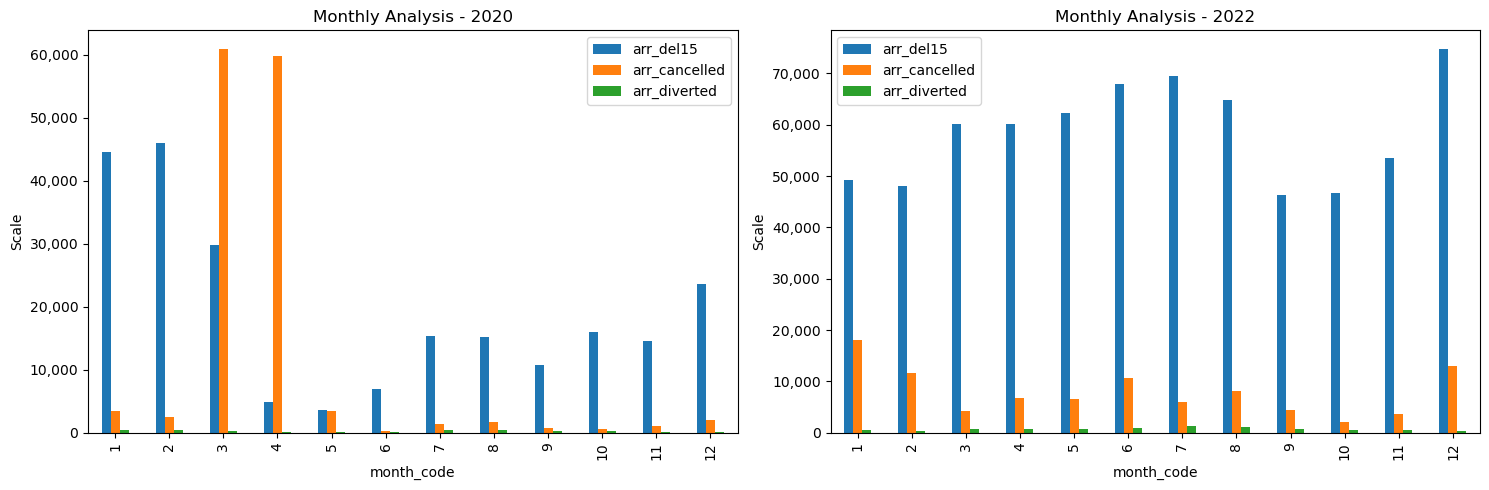

In [21]:
# Define variables for plot 
plot_2_variables = ['arr_del15','arr_cancelled', 'arr_diverted']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot for 2020
top_20_airport_2020.groupby('month_code')[plot_2_variables].sum().plot(ax=axes[0], kind='bar', title='Monthly Analysis - 2020')
axes[0].set_ylabel('Scale')
# Plot for 2022
top_20_airport_2022.groupby('month_code')[plot_2_variables].sum().plot(ax=axes[1], kind='bar', title='Monthly Analysis - 2022')
axes[1].set_ylabel('Scale')

for ax in axes:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))


plt.tight_layout()
plt.show()


3. Covid Analysis Result(number of delayed, cancelled, diverted flights)

In [22]:
# There was a spike in cancelled flight in march and april of 2020. 
# we can see the relations between the high number of cancelled flights and low number of arriving flight shown in the first graph
# The number of delayed flight for has the same pattern with the arriving flights shown in the first graph...
# Towards the end of the year, flights cancellation was not much of an issue, but there was an increase in dely( shown in Delayed Flight Ratio)...

4. Time of the year analysis(number of arriving and delayed flights)

In [24]:
# Again using year 2022(previous year) as sample data..
# The number of delayed flight has the same pattern with the arriving flights plot shown earlier
# However, there were less canclled flights in 2022 despite having significant higher number in arriving flight
# With October having the lowest number of cancelled flights and January having the highest...

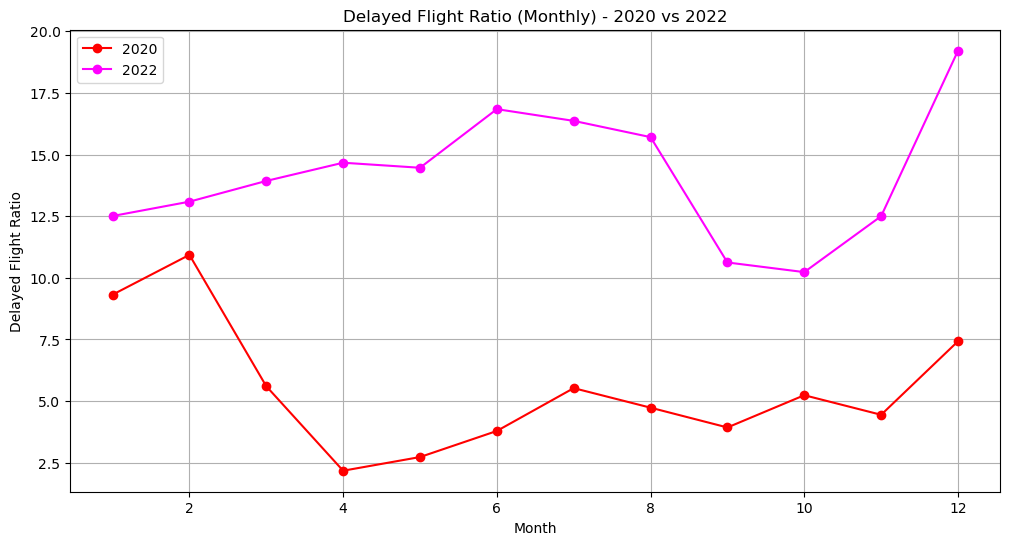

In [25]:
# Define variables for plot
plot_3_variables = ['arr_flights', 'arr_delay']

# Group by month and sum for both years
data_2020 = top_20_airport_2020.groupby('month_code')[plot_3_variables].sum()
data_2022 = top_20_airport_2022.groupby('month_code')[plot_3_variables].sum()

# Calculate the ratio of delayed flights to arriving flights
data_2020['delayed_ratio'] = data_2020['arr_delay'] / data_2020['arr_flights']
data_2022['delayed_ratio'] = data_2022['arr_delay'] / data_2022['arr_flights']

# Plotting individual line graphs for delayed ratio
plt.figure(figsize=(12, 6))

plt.plot(data_2020.index, data_2020['delayed_ratio'], label='2020', marker='o', color='red')
plt.plot(data_2022.index, data_2022['delayed_ratio'], label='2022', marker='o', color='magenta')

plt.title('Delayed Flight Ratio (Monthly) - 2020 vs 2022')
plt.xlabel('Month')
plt.ylabel('Delayed Flight Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# the lineplot shows the ratio of delayed and cancalled flight for year 2020 and 2022
# A better visual for the performance metrics displaying peaks or spikes in the ratio to indicate periods with a higher likelihood of delays

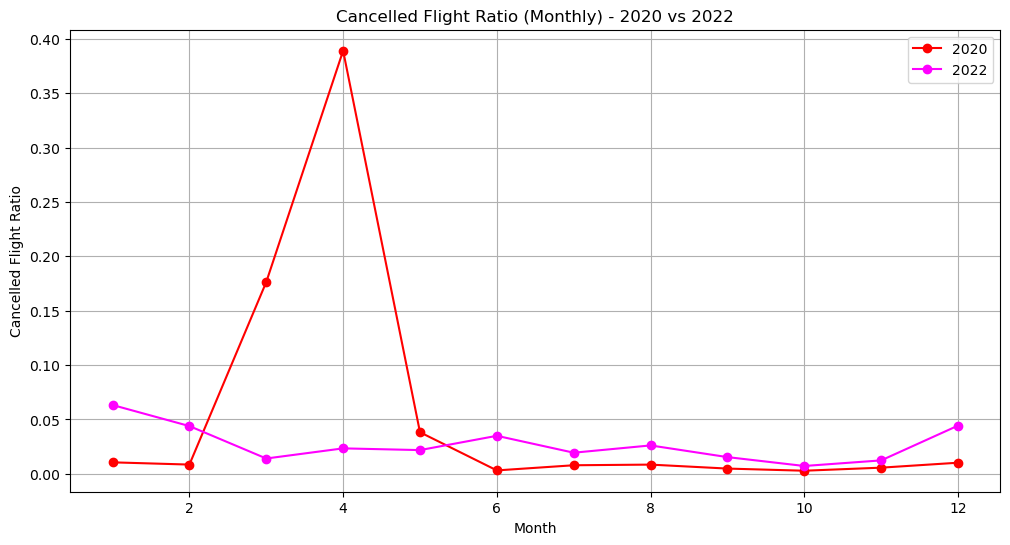

In [27]:
# Define variables for plot 
plot_4_variables = ['arr_flights', 'arr_cancelled']

# Group by month and sum for both years
data_2020 = top_20_airport_2020.groupby('month_code')[plot_4_variables].sum()
data_2022 = top_20_airport_2022.groupby('month_code')[plot_4_variables].sum()

# Calculate the ratio of delayed flights to arriving flights
data_2020['delayed_ratio'] = data_2020['arr_cancelled'] / data_2020['arr_flights']
data_2022['delayed_ratio'] = data_2022['arr_cancelled'] / data_2022['arr_flights']

# Plotting individual line graphs for delayed ratio
plt.figure(figsize=(12, 6))

plt.plot(data_2020.index, data_2020['delayed_ratio'], label='2020', marker='o', color='red')
plt.plot(data_2022.index, data_2022['delayed_ratio'], label='2022', marker='o', color='magenta')

plt.title('Cancelled Flight Ratio (Monthly) - 2020 vs 2022')
plt.xlabel('Month')
plt.ylabel('Cancelled Flight Ratio')
plt.legend()
plt.grid(True)
plt.show()

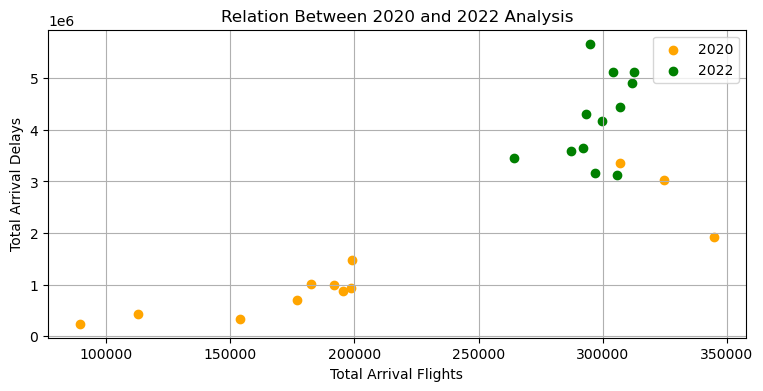

In [28]:
# Define variables for plot
plot_5_variables = ['arr_flights', 'arr_delay']

# Group by month and sum for both years
data_2020 = top_20_airport_2020.groupby('month_code')[plot_5_variables].sum()
data_2022 = top_20_airport_2022.groupby('month_code')[plot_5_variables].sum()

# Plotting
plt.figure(figsize=(9, 4))

plt.scatter(data_2020['arr_flights'], data_2020['arr_delay'], label='2020', color='orange')
plt.scatter(data_2022['arr_flights'], data_2022['arr_delay'], label='2022', color='green')

for ax in axes:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('Relation Between 2020 and 2022 Analysis')
plt.xlabel('Total Arrival Flights')
plt.ylabel('Total Arrival Delays')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# More flights were arrived and was delayed in 2022.

# Root Cause Analysis

------


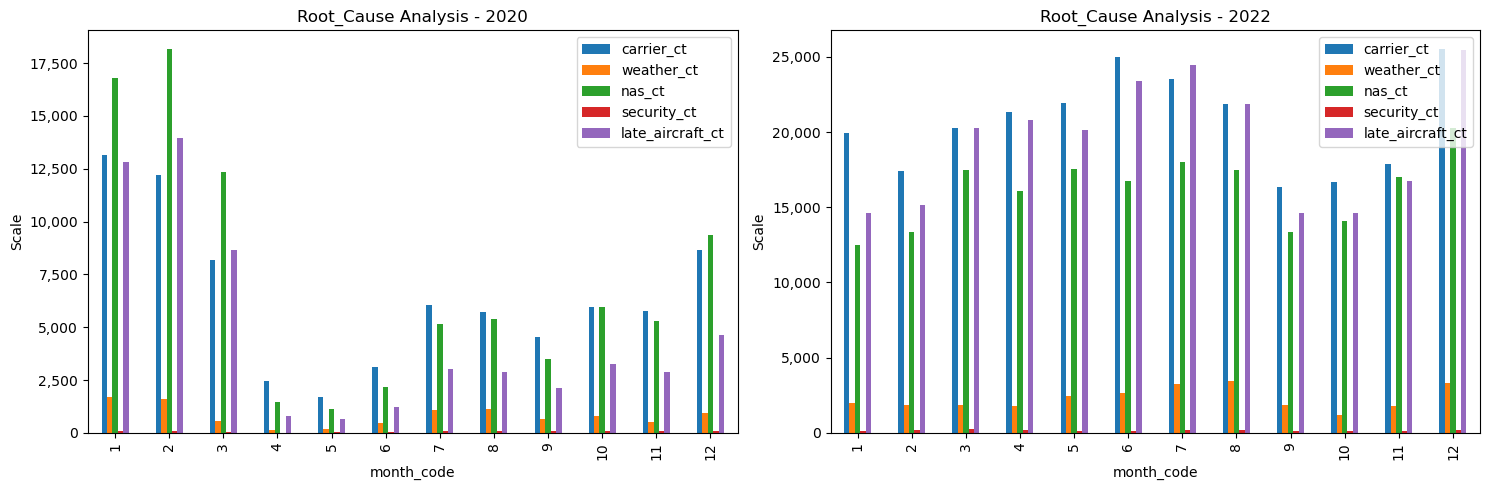

In [30]:
# Define variables for plot 
plot_6_variables = ['carrier_ct','weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot for 2020
top_20_airport_2020.groupby('month_code')[plot_6_variables].sum().plot(ax=axes[0], kind='bar', title='Root_Cause Analysis - 2020')
axes[0].set_ylabel('Scale')
# Plot for 2022
top_20_airport_2022.groupby('month_code')[plot_6_variables].sum().plot(ax=axes[1], kind='bar', title='Root_Cause Analysis - 2022')
axes[1].set_ylabel('Scale')

for ax in axes:
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))


plt.tight_layout()
plt.show()

In [31]:
# Results 
# The data doesnt focus on details of causes of delay, we can only give results based on assumptions for the causes 
# For year 2020, delay was caused majorly by the National Airspace system before the pandemic 
# During the pandemic, late aircraft became the major cause and the same with year 2022
# For year 2022, airlines and late aircraft, peaking in Dec, Jun, and July.
# Although winter time is the worst season of year, in 2022, delayed caused by weather was highest around the summer time. 

# Correlation Analaysis

------

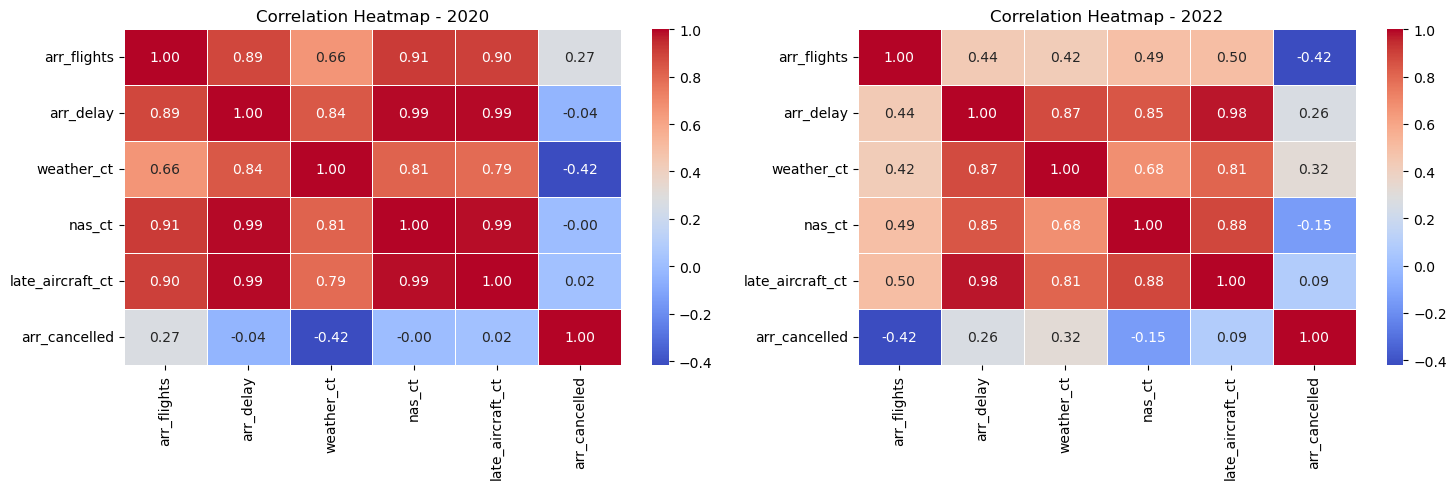

In [32]:
# Extract relevant columns
plot_7_variables = ['arr_flights', 'arr_delay', 'weather_ct', 'nas_ct', 'late_aircraft_ct', 'arr_cancelled' ]
data_2020 = top_20_airport_2020.groupby('month_code')[plot_7_variables].sum()
data_2022 = top_20_airport_2022.groupby('month_code')[plot_7_variables].sum()

# Calculate correlation matrices
correlation_matrix_2020 = data_2020.corr()
correlation_matrix_2022 = data_2022.corr()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Heatmap for 2020
sns.heatmap(correlation_matrix_2020, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title('Correlation Heatmap - 2020')

# Heatmap for 2022
sns.heatmap(correlation_matrix_2022, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1])
axes[1].set_title('Correlation Heatmap - 2022')

plt.tight_layout()
plt.show()